In [1]:
#Image Reconstruction using Singular Value Decomposition (SVD) in Python
#https://www.geeksforgeeks.org/image-reconstruction-using-singular-value-decomposition-svd-in-python/

In [4]:
# import module
import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# assign and open image
url = 'https://media.geeksforgeeks.org/wp-content/cdn-uploads/20210401173418/Webp-compressed.jpg'
response = requests.get(url, stream=True)
 
with open('image.png', 'wb') as f:
    f.write(response.content)
 
img = cv2.imread('image.png')
 
# Converting the image into gray scale for faster
# computation.
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
# Calculating the SVD
u, s, v = np.linalg.svd(gray_image, full_matrices=False)
 
# inspect shapes of the matrices
print(f'u.shape:{u.shape},s.shape:{s.shape},v.shape:{v.shape}')


u.shape:(3648, 3648),s.shape:(3648,),v.shape:(3648, 5472)


variance Explained by Top 20 singular values:
[9.9795e-01 7.4000e-04 3.8900e-04 3.0500e-04 1.0600e-04 7.4000e-05
 5.7000e-05 3.9000e-05 3.1000e-05 2.6000e-05 2.2000e-05 1.9000e-05
 1.5000e-05 1.4000e-05 1.1000e-05 9.0000e-06 9.0000e-06 7.0000e-06
 7.0000e-06 6.0000e-06]


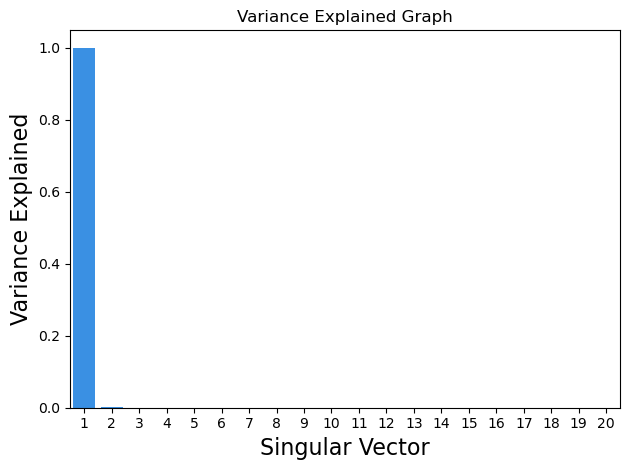

In [8]:
# import module
import seaborn as sns
 
var_explained = np.round(s**2/np.sum(s**2), decimals=6)
 
# Variance explained top Singular vectors
print(f'variance Explained by Top 20 singular values:\n{var_explained[0:20]}')
 
sns.barplot(x=list(range(1, 21)),
            y=var_explained[0:20], color="dodgerblue")
 
plt.title('Variance Explained Graph')
plt.xlabel('Singular Vector', fontsize=16)
plt.ylabel('Variance Explained', fontsize=16)
plt.tight_layout()
plt.show()


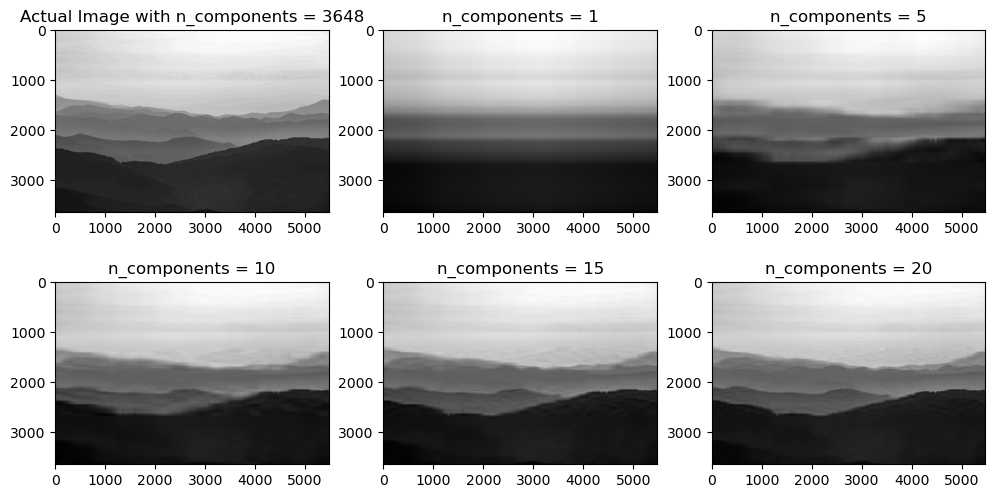

In [9]:
# plot images with different number of components
comps = [3648, 1, 5, 10, 15, 20]
plt.figure(figsize=(12, 6))
 
for i in range(len(comps)):
    low_rank = u[:, :comps[i]] @ np.diag(s[:comps[i]]) @ v[:comps[i], :]
     
    if(i == 0):
        plt.subplot(2, 3, i+1),
        plt.imshow(low_rank, cmap='gray'),
        plt.title(f'Actual Image with n_components = {comps[i]}')
     
    else:
        plt.subplot(2, 3, i+1),
        plt.imshow(low_rank, cmap='gray'),
        plt.title(f'n_components = {comps[i]}')
